In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = "/content/drive/MyDrive/prep2_train.csv"
df = pd.read_csv(csv_path)
df["polarization"] = df["polarization"].astype(int)

Mounted at /content/drive


In [3]:
train_data, val_data = train_test_split(df, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(
    analyzer='char_wb',
    ngram_range=(1,3),
    max_features=50000
)

X_train = vectorizer.fit_transform(train_data["text"])
y_train = train_data["polarization"].values

X_val = vectorizer.transform(val_data["text"])
y_val = val_data["polarization"].values

In [4]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_val_prob = model.predict_proba(X_val)[:,1]

In [6]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

cm = confusion_matrix(y_val, y_val_pred)

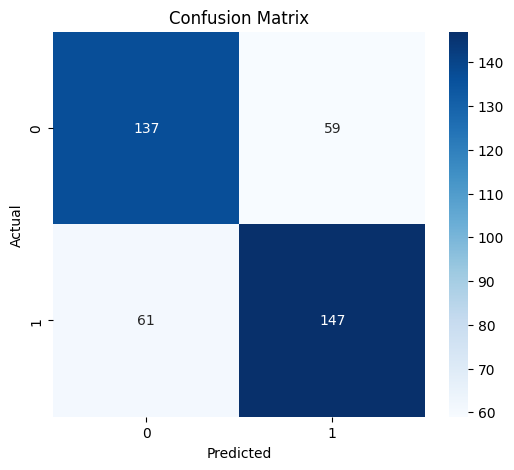

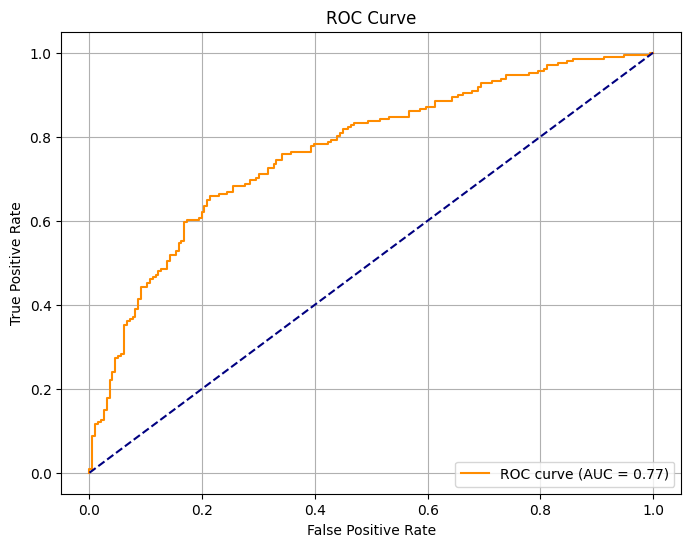

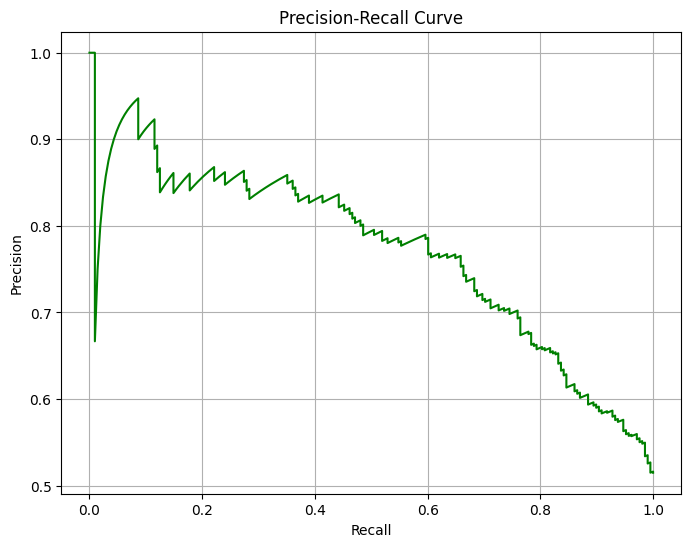

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_val_prob)
plt.figure(figsize=(8,6))
plt.plot(recall_vals, precision_vals, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

metrics_data = {
    "train_accuracy": train_accuracy,
    "train_precision": train_precision,
    "train_recall": train_recall,
    "train_f1": train_f1,
    "val_accuracy": val_accuracy,
    "val_precision": val_precision,
    "val_recall": val_recall,
    "val_f1": val_f1,
    "confusion_matrix": cm.tolist()
}

with open("tfidf_logreg_metrics.json", "w") as f:
    json.dump(metrics_data, f, indent=4)

In [13]:
text = "Trump should be shot"
text_vec = vectorizer.transform([text])
pred_class = model.predict(text_vec)[0]

print(pred_class)
if pred_class == 1:
    print("Polarized")
else:
    print("Not Polarized")

0
Not Polarized
